# Limpa dados brutos

Este notebook busca limpar explorar e limpar dados nulos e/ou inconsistentes e salvar os dados pre-processados

### Define bibliotecas

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

## Importação de dados

In [2]:
df_demographic = pd.read_csv('raw_data/DemographicData_ZCTAs.csv', index_col=0)
df_economic = pd.read_csv('raw_data/EconomicData_ZCTAs.csv', index_col=0)
df_geographic = pd.read_csv('raw_data/df_geocode.csv', index_col=0)
df_exams = pd.read_csv('raw_data/exams_data.csv', index_col=0)
df_transactional = pd.read_csv('raw_data/transactional_data.csv', sep=';')

## Análise de dados inconsistentes, nulos, correção de formato e primeiras transformações de dados

### Dados Transacionais

In [3]:
df_transactional

,Patient Id,Gender,Date of birth,Date of service,Service Id,Lab Id,CodItem,Testing Cost
0,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70003237,"9,0"
1,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000638,"13,0"
2,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70001597,"49,0"
3,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000103,"11,0"
4,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000224,"10,0"
...,...,...,...,...,...,...,...,...
2355236,7664157546-1,M,06/03/1971 00:00:00,2021-02-12,7664157546-1-1,L697,70004038,"10,0"
2355237,7664157546-1,M,06/03/1971 00:00:00,2021-02-12,7664157546-1-1,L697,70004134,"10,0"
2355238,7664157546-1,M,06/03/1971 00:00:00,2021-02-12,7664157546-1-1,L697,70003056,"9,0"
2355239,7664157546-1,M,06/03/1971 00:00:00,2021-02-12,7664157546-1-1,L697,70004185,"13,0"


In [4]:
df_transactional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2355241 entries, 0 to 2355240
Data columns (total 8 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   Patient Id       object
 1   Gender           object
 2   Date of birth    object
 3   Date of service  object
 4   Service Id       object
 5   Lab Id           object
 6   CodItem          int64 
 7   Testing Cost     object
dtypes: int64(1), object(7)
memory usage: 143.8+ MB


#### Gênero

Verificando inconsistências nos dados de gênero.

In [5]:
df_transactional['Gender'].describe()

count     2355241
unique          3
top             F
freq      1500465
Name: Gender, dtype: object

In [6]:
df_transactional['Gender'].value_counts()

Gender
F    1500465
M     854766
I         10
Name: count, dtype: int64

In [7]:
df_transactional[df_transactional['Gender'] == 'I']

,Patient Id,Gender,Date of birth,Date of service,Service Id,Lab Id,CodItem,Testing Cost
85068,-2,I,01/01/1900 00:00:00,2019-02-22,532800338922-132,L069,70003759,"14,0"
356628,-2,I,01/01/1900 00:00:00,2019-04-04,573200638885-52,L140,70000301,"12,0"
356629,-2,I,01/01/1900 00:00:00,2019-04-04,573200638885-52,L140,70001276,"53,0"
356630,-2,I,01/01/1900 00:00:00,2019-04-04,573200638885-52,L140,70004134,"10,0"
356631,-2,I,01/01/1900 00:00:00,2019-04-04,573200638885-52,L140,70003200,"9,0"
356632,-2,I,01/01/1900 00:00:00,2019-04-04,573200638885-52,L140,70002619,"12,0"
356633,-2,I,01/01/1900 00:00:00,2019-05-04,571904995402-38,L133,70002141,"47,0"
356634,-2,I,01/01/1900 00:00:00,2019-05-04,571904995402-38,L133,70003239,"47,0"
637178,-2,I,01/01/1900 00:00:00,2019-08-31,569403826990-11,L121,70006532,"0,0"
637179,-2,I,01/01/1900 00:00:00,2019-08-31,569403826990-11,L121,70006532,"0,0"


Observa-se 10 registros com valores de gênero inconsistêntes ("I"). Além disso, nestes registros existem outros dados inconsistentes, como 'Patient Id' e 'Date of birth'.

Imputar dados neste caso pode ser perigoso pois estaremos adicionando um grau de incerteza em 3 variáveis.

Além disso, a quantidade de registros com estas características é pequena em relação aos dados totais.

Por isso, estes dados serão removidos.

In [8]:
# Remover as linhas com valores inconsistentes em gênero
df_transactional = df_transactional[df_transactional["Gender"] != 'I']


In [9]:
# Verifica remoção
df_transactional["Gender"].value_counts()

Gender
F    1500465
M     854766
Name: count, dtype: int64

#### Testing cost

Os dados de custo do exame (Testing Cost) estão em formato não númerico e separados por vírgula. Vamos transformar estes dados para float.

In [10]:
df_transactional['Testing Cost'] = df_transactional['Testing Cost'].str.replace(',', '.').astype(float)

/tmp/ipykernel_57859/3977722004.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transactional['Testing Cost'] = df_transactional['Testing Cost'].str.replace(',', '.').astype(float)


In [11]:
# Verificando transformação
df_transactional['Testing Cost']

0           9.0
1          13.0
2          49.0
3          11.0
4          10.0
           ... 
2355236    10.0
2355237    10.0
2355238     9.0
2355239    13.0
2355240     8.0
Name: Testing Cost, Length: 2355231, dtype: float64

#### Datas

Os dados de data (Date of birth e Date of service) estão como objeto. Vamos transformá-los em datetime

In [12]:
df_transactional["Date of birth"] = pd.to_datetime(df_transactional["Date of birth"], format='%d/%m/%Y %H:%M:%S', errors='coerce')
df_transactional["Date of service"] = pd.to_datetime(df_transactional["Date of service"], format='%Y-%m-%d', errors='coerce')

/tmp/ipykernel_57859/3997943533.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transactional["Date of birth"] = pd.to_datetime(df_transactional["Date of birth"], format='%d/%m/%Y %H:%M:%S', errors='coerce')
/tmp/ipykernel_57859/3997943533.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transactional["Date of service"] = pd.to_datetime(df_transactional["Date of service"], format='%Y-%m-%d', errors='coerce')


Verificação de dados nulos

In [13]:
df_transactional.isnull().sum()

Patient Id         0
Gender             0
Date of birth      1
Date of service    0
Service Id         0
Lab Id             0
CodItem            0
Testing Cost       0
dtype: int64

In [14]:
# Verificando qual é o registro que está com o valor nulo
df_transactional[df_transactional.isnull().any(axis=1)]

,Patient Id,Gender,Date of birth,Date of service,Service Id,Lab Id,CodItem,Testing Cost
1253947,7659985004-1,F,NaT,2020-02-22,7659985004-2-1,L152,70000107,48.0


In [15]:
# Será que esse paciente possui outro registro?
df_transactional[df_transactional['Patient Id'] == '7659985004-1']

,Patient Id,Gender,Date of birth,Date of service,Service Id,Lab Id,CodItem,Testing Cost
1253947,7659985004-1,F,NaT,2020-02-22,7659985004-2-1,L152,70000107,48.0


Temos apenas um dado nulo no campo data de nascimento e este paciente não possui nenhum outro registro de exame.

Uma possibilidade seria excluí-lo. Porém, todos outros campos possuem dados válidos e aparentemente úteis, portanto uma melhor opção será imputar o valor de data de nascimento. 

Uma boa técnica de imputação é utilizar a mediana, pois conserva características estatísticas da população observada. 

In [16]:
df_transactional["Date of birth"].fillna(df_transactional['Date of birth'].median(), inplace=True)

/tmp/ipykernel_57859/1980356049.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_transactional["Date of birth"].fillna(df_transactional['Date of birth'].median(), inplace=True)
/tmp/ipykernel_57859/1980356049.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transactional["Date of birth"].fillna(df_transactional['Date of birth'].med

In [17]:
# Verificando se o valor nulo foi preenchido
df_transactional[df_transactional['Patient Id'] == '7659985004-1']

,Patient Id,Gender,Date of birth,Date of service,Service Id,Lab Id,CodItem,Testing Cost
1253947,7659985004-1,F,1977-08-29,2020-02-22,7659985004-2-1,L152,70000107,48.0


Em uma verificação rápida nos dados anteriores, uma variável interessante de ser extraída é a idade quando o exame foi realizado. Esta variável pode dar insights interessantes sobre idade dos pacientes em uma determinada região nas próximas etapas.

In [18]:
df_transactional['age_at_service'] = (df_transactional['Date of service'].dt.year - df_transactional['Date of birth'].dt.year).astype(int)

/tmp/ipykernel_57859/3157182075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transactional['age_at_service'] = (df_transactional['Date of service'].dt.year - df_transactional['Date of birth'].dt.year).astype(int)


Verificando a distribuição de idades para analisar se existem dados outliers.


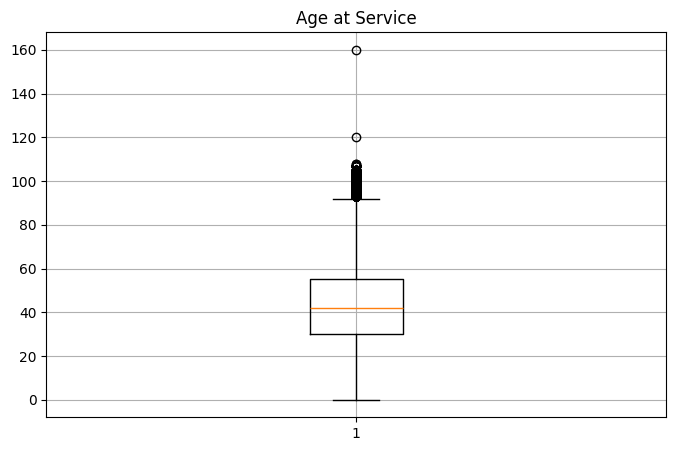

count    2.355231e+06
mean     4.195254e+01
std      1.748467e+01
min      0.000000e+00
25%      3.000000e+01
50%      4.200000e+01
75%      5.500000e+01
max      1.600000e+02
Name: age_at_service, dtype: float64

In [19]:
# df_transactional['age_at_service'].plot()
# boxplot de age_at_service
plt.figure(figsize=(8, 5))
plt.boxplot(df_transactional['age_at_service'])
plt.title('Age at Service')
plt.grid()
plt.show()

df_transactional['age_at_service'].describe()

In [20]:
df_transactional[df_transactional['age_at_service'] > 105]

,Patient Id,Gender,Date of birth,Date of service,Service Id,Lab Id,CodItem,Testing Cost,age_at_service
67251,10240392383-BIO010,M,1911-08-20,2019-02-06,529400111857-122,L668,70005506,55.0,108
72817,10240388647-BIO010,F,1912-09-07,2019-01-31,529709889235-123,L658,70005506,55.0,107
157572,10240370370-BIO010,M,1911-08-20,2019-03-03,529400114551-122,L668,70005506,55.0,108
830128,10225811036-BIO002,M,1859-12-28,2019-09-19,574604575219-67,L152,70004795,264.0,160
1445526,7659764762-1,M,1913-03-15,2020-02-08,7659764762-3-1,L669,70005139,0.0,107
1445527,7659764762-1,M,1913-03-15,2020-02-08,7659764762-3-1,L669,70000103,11.0,107
1445528,7659764762-1,M,1913-03-15,2020-02-08,7659764762-3-1,L669,70004186,14.0,107
1445529,7659764762-1,M,1913-03-15,2020-02-08,7659764762-3-1,L669,70004038,10.0,107
1445530,7659764762-1,M,1913-03-15,2020-02-08,7659764762-3-1,L669,70003318,10.0,107
1445531,7659764762-1,M,1913-03-15,2020-02-08,7659764762-3-1,L669,70000638,13.0,107


Os dados de idade apresentam outliers. 

Realizando uma breve pesquisa na internet, é factível pensar que 107 ou 108 anos são idades factíveis de pessoas idosas. Naturalmente, uma grande quantidade de pessoas idosas realizam exames médicos críticos.

Porém, os registros que mostram idades de 120 e 160 anos ao realizar exames são idades avançadas demais e serão considerados dados espúrios.

fonte: https://pt.wikipedia.org/wiki/Lista_das_pessoas_mais_velhas_do_mundo

Será utilizada técnica de Winsorização, ou seja, esses outliers são limitados aos valores máximos considerados factíveis.

In [21]:
df_transactional.loc[df_transactional['age_at_service'] > 110, 'age_at_service'] = 108

In [22]:
# Verifica Winsorização
df_transactional[df_transactional['age_at_service'] > 105]

,Patient Id,Gender,Date of birth,Date of service,Service Id,Lab Id,CodItem,Testing Cost,age_at_service
67251,10240392383-BIO010,M,1911-08-20,2019-02-06,529400111857-122,L668,70005506,55.0,108
72817,10240388647-BIO010,F,1912-09-07,2019-01-31,529709889235-123,L658,70005506,55.0,107
157572,10240370370-BIO010,M,1911-08-20,2019-03-03,529400114551-122,L668,70005506,55.0,108
830128,10225811036-BIO002,M,1859-12-28,2019-09-19,574604575219-67,L152,70004795,264.0,108
1445526,7659764762-1,M,1913-03-15,2020-02-08,7659764762-3-1,L669,70005139,0.0,107
1445527,7659764762-1,M,1913-03-15,2020-02-08,7659764762-3-1,L669,70000103,11.0,107
1445528,7659764762-1,M,1913-03-15,2020-02-08,7659764762-3-1,L669,70004186,14.0,107
1445529,7659764762-1,M,1913-03-15,2020-02-08,7659764762-3-1,L669,70004038,10.0,107
1445530,7659764762-1,M,1913-03-15,2020-02-08,7659764762-3-1,L669,70003318,10.0,107
1445531,7659764762-1,M,1913-03-15,2020-02-08,7659764762-3-1,L669,70000638,13.0,107


#### Salvando dados limpos

Após limpezas e transformações os dados transacionais são apresentados abaixo e salvos na pasta "curated_data/"

In [23]:
df_transactional

,Patient Id,Gender,Date of birth,Date of service,Service Id,Lab Id,CodItem,Testing Cost,age_at_service
0,10210830256-BIO003,F,1976-08-01,2019-01-07,571904533475-38,L133,70003237,9.0,43
1,10210830256-BIO003,F,1976-08-01,2019-01-07,571904533475-38,L133,70000638,13.0,43
2,10210830256-BIO003,F,1976-08-01,2019-01-07,571904533475-38,L133,70001597,49.0,43
3,10210830256-BIO003,F,1976-08-01,2019-01-07,571904533475-38,L133,70000103,11.0,43
4,10210830256-BIO003,F,1976-08-01,2019-01-07,571904533475-38,L133,70000224,10.0,43
...,...,...,...,...,...,...,...,...,...
2355236,7664157546-1,M,1971-03-06,2021-02-12,7664157546-1-1,L697,70004038,10.0,50
2355237,7664157546-1,M,1971-03-06,2021-02-12,7664157546-1-1,L697,70004134,10.0,50
2355238,7664157546-1,M,1971-03-06,2021-02-12,7664157546-1-1,L697,70003056,9.0,50
2355239,7664157546-1,M,1971-03-06,2021-02-12,7664157546-1-1,L697,70004185,13.0,50


In [24]:
df_transactional.to_csv('curated_data/transactional_data.csv', index=False)

### Dados de exames

In [25]:
df_exams

,Desc Item,Category,Family,Speciality,Testing Cost
CodItem,,,,,
70003237,"MAGNESIO, SORO (EXEMPLO DE EXPRESSAO DE RESULT...",CA,CORELAB,BIOCHEMISTRY,1.78
70000638,"HEMOGRAMA, AUTOMATIZADO, SANGUE",CA,HEMATO,BLOOD COUNT,2.46
70001597,"FERRITINA, SORO",CA,CORELAB,IMMUNOHORMONE,2.11
70000103,"FERRO, DOSAGEM, SORO (EXEMPLO DE EXPRESSAO DE ...",CA,CORELAB,BIOCHEMISTRY,0.80
70000224,"CALCIO, DOSAGEM, SORO (EXEMPLO DE EXPRESSAO DE...",CA,CORELAB,BIOCHEMISTRY,1.02
...,...,...,...,...,...
70008635,"GENES BRCA1 E BRCA2, MLPA, SANGUE",CA,GENETICS,SPECIAL GENETICS,159.91
70005303,"OBSTETRICA 1§ TRIMESTRE (ENDOVAGINAL), SEGUNDO...",RID,ULTRASOUND,FETAL MEDICINE,111.43
70006441,"HEMOFILIA A, ANALISE DO DNA, SEQUENCIAMENTO, S...",CA,GENETICS,SPECIAL GENETICS,27.03


Verifica valores nulos

In [26]:
df_exams.isnull().sum()

Desc Item       0
Category        0
Family          0
Speciality      0
Testing Cost    0
dtype: int64

In [27]:
df_exams.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2002 entries, 70003237 to 70001506
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Desc Item     2002 non-null   object 
 1   Category      2002 non-null   object 
 2   Family        2002 non-null   object 
 3   Speciality    2002 non-null   object 
 4   Testing Cost  2002 non-null   float64
dtypes: float64(1), object(4)
memory usage: 93.8+ KB


Verifica consistência dos valores de custo dos exames

,Testing Cost
count,2002.000000
mean,77.767453
std,146.066382
min,0.000000
25%,4.812500
50%,21.190000
75%,79.270000
max,1762.460000


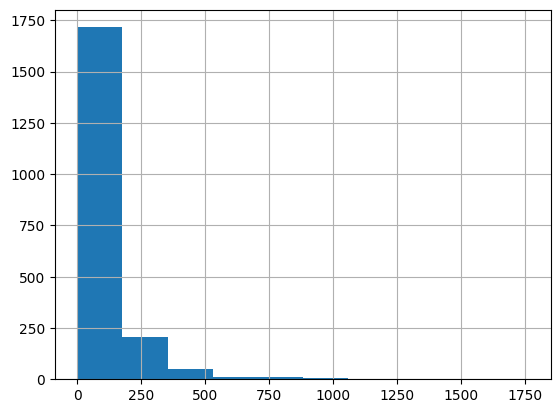

In [28]:
df_exams["Testing Cost"].hist()
df_exams.describe()

Dados de exames aparentam consistentes e não necessitam nenhuma limpeza ou transformação

#### Salvamento de dados

In [29]:
df_exams.to_csv('curated_data/exams_data.csv', index=False)

### Dados Demográficos

In [30]:
df_demographic

,Id,GeographicAreaName,TotalPopulation,SexRatio(males per 100 females),Population_Under5Years,Population_5to9Years,Population_10to14Years,Population_15to19Years,Population_20to24Years,Population_25to34Years,Population_35to44Years,Population_45to54Years,Population_55to59Years,Population_60to64Years,Population_65to74Years,Population_75to84Years,Population_85YearsAndOver,MedianAgeInYears
0,8600000US35004,ZCTA5 35004,12045,94.1,805,1075,898,477,578,2088,1628,1200,886,683,1017,534,176,35.5
1,8600000US35005,ZCTA5 35005,7344,86.1,504,453,511,499,214,788,795,968,612,561,798,485,156,44.0
2,8600000US35006,ZCTA5 35006,2883,108.2,96,153,303,129,156,183,367,430,296,260,280,201,29,47.2
3,8600000US35007,ZCTA5 35007,26332,95.0,1936,1992,1837,1762,1376,3119,3849,3907,1665,1323,2096,1106,364,37.7
4,8600000US35010,ZCTA5 35010,20613,90.5,1306,1465,944,1217,1128,2513,2106,2950,1512,1472,2421,1155,424,42.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33115,8600000US00979,ZCTA5 00979,16130,91.6,402,532,554,726,1005,1935,2109,2468,1368,1148,1974,1363,546,48.7
33116,8600000US00982,ZCTA5 00982,14346,81.0,431,952,795,769,854,1975,1446,1769,957,948,1201,1654,595,44.8
33117,8600000US00983,ZCTA5 00983,33947,81.4,1833,1589,1841,2203,2957,4809,3712,4081,1930,1574,4003,2405,1010,40.8
33118,8600000US00985,ZCTA5 00985,31682,82.4,1171,1427,1833,2304,2032,3491,3966,4073,1732,2047,4207,2498,901,43.6


#### Verificando tamanho das populações

count     33120.000000
mean       9903.343961
std       14714.043400
min           0.000000
25%         705.750000
50%        2801.000000
75%       13475.250000
max      128294.000000
Name: TotalPopulation, dtype: float64

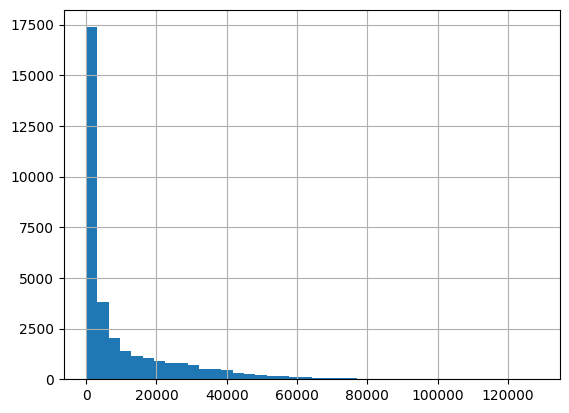

In [31]:
df_demographic["TotalPopulation"].hist(bins=40)
df_demographic["TotalPopulation"].describe()


A distribuição de população entre as regiões segue distribuição de pareto, onde uma pequena porcentagem das regiões (grandes centros urbanos) concentra uma grande porcentagem da população total, enquanto muitas outras regiões (regiões rurais) possuem populações menores. 


In [32]:
df_demographic[df_demographic["TotalPopulation"] == 0]

,Id,GeographicAreaName,TotalPopulation,SexRatio(males per 100 females),Population_Under5Years,Population_5to9Years,Population_10to14Years,Population_15to19Years,Population_20to24Years,Population_25to34Years,Population_35to44Years,Population_45to54Years,Population_55to59Years,Population_60to64Years,Population_65to74Years,Population_75to84Years,Population_85YearsAndOver,MedianAgeInYears
47,8600000US35082,ZCTA5 35082,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
142,8600000US35457,ZCTA5 35457,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
539,8600000US36590,ZCTA5 36590,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
552,8600000US36615,ZCTA5 36615,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
651,8600000US99513,ZCTA5 99513,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32920,8600000US82715,ZCTA5 82715,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
32955,8600000US82936,ZCTA5 82936,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
32981,8600000US83121,ZCTA5 83121,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
33099,8600000US00950,ZCTA5 00950,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN


In [33]:
print(f" {df_demographic[df_demographic["TotalPopulation"] == 0].shape[0]} regiões com nenhum habitante")
print(f" {df_demographic[df_demographic["TotalPopulation"] < 10].shape[0]} regiões com menos de 10 habitantes")
print(f" {df_demographic[df_demographic["TotalPopulation"] < 10]["SexRatio(males per 100 females)"].isnull().sum()} registros com dados de gênero nulos nas regiões com menos de 10 habitantes")
print(f" {df_demographic[df_demographic["TotalPopulation"] < 10]["MedianAgeInYears"].isnull().sum()} registros com dados de idade nulos nas regiões com menos de 10 habitantes")



 344 regiões com nenhum habitante
 405 regiões com menos de 10 habitantes
 386 registros com dados de gênero nulos nas regiões com menos de 10 habitantes
 390 registros com dados de idade nulos nas regiões com menos de 10 habitantes


Observa-se 344 regiões onde não há habitantes. Essas regiões também apresentam dados de Mediana de idade (MedianAgeInYears) e razão de gênero (SexRatio) nulos, já que não há população para obter essas estatísticas.

Além disso, boa parte das 405 regiões com menos que 10 habitantes possuem dados de gênero nulos


Essas regiões podem ser removidas, já que possuem população muito baixa e não irão agregar para a análise.

In [34]:
df_demographic_clean = df_demographic[df_demographic["TotalPopulation"] > 10]

#### Dados de gênero

In [35]:
df_demographic_clean[df_demographic_clean["SexRatio(males per 100 females)"].isnull()]

,Id,GeographicAreaName,TotalPopulation,SexRatio(males per 100 females),Population_Under5Years,Population_5to9Years,Population_10to14Years,Population_15to19Years,Population_20to24Years,Population_25to34Years,Population_35to44Years,Population_45to54Years,Population_55to59Years,Population_60to64Years,Population_65to74Years,Population_75to84Years,Population_85YearsAndOver,MedianAgeInYears
5,8600000US35013,ZCTA5 35013,46,NaN,0,0,0,0,0,0,15,31,0,0,0,0,0,47.9
875,8600000US99923,ZCTA5 99923,14,NaN,0,0,0,0,0,0,0,0,0,0,14,0,0,NaN
1084,8600000US85608,ZCTA5 85608,4671,NaN,0,0,0,91,519,1775,1532,598,86,19,51,0,0,34.7
1220,8600000US86313,ZCTA5 86313,249,NaN,0,0,0,0,18,57,21,16,51,38,23,11,14,56.3
1656,8600000US72467,ZCTA5 72467,285,NaN,0,0,0,232,47,6,0,0,0,0,0,0,0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31718,8600000US25853,ZCTA5 25853,14,NaN,0,0,0,0,0,0,0,0,0,0,0,14,0,NaN
31836,8600000US26228,ZCTA5 26228,15,NaN,0,0,0,0,0,0,0,0,0,15,0,0,0,NaN
31847,8600000US26259,ZCTA5 26259,31,NaN,0,0,0,0,0,0,0,18,0,13,0,0,0,NaN
31895,8600000US26366,ZCTA5 26366,38,NaN,0,0,0,0,0,23,0,15,0,0,0,0,0,NaN


Mesmo após remover regiões com menos de 10 habitantes, existem 112 valores nulos nos dados de gênero.

Porém, nestes casos é factível imputar valores de acordo com a mediana.


In [36]:
sex_ratio_median = df_demographic_clean["SexRatio(males per 100 females)"].median()
df_demographic_clean["SexRatio(males per 100 females)"].fillna(sex_ratio_median, inplace=True)

/tmp/ipykernel_57859/1994979517.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_demographic_clean["SexRatio(males per 100 females)"].fillna(sex_ratio_median, inplace=True)
/tmp/ipykernel_57859/1994979517.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_demographic_clean["SexRatio(males per 100 females)"].fillna(sex_ratio_median, i

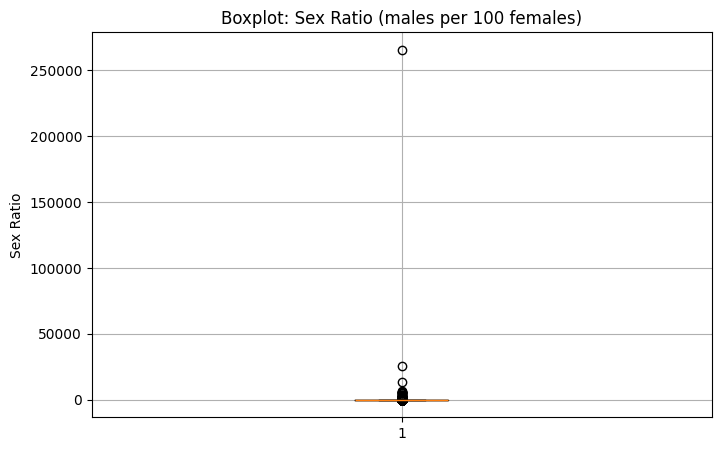

count     32706.00000
mean        116.73090
std        1481.20183
min           0.50000
25%          91.40000
50%          98.40000
75%         107.90000
max      265600.00000
Name: SexRatio(males per 100 females), dtype: float64

In [37]:

plt.figure(figsize=(8, 5))
plt.boxplot(df_demographic["SexRatio(males per 100 females)"].dropna())
plt.title('Boxplot: Sex Ratio (males per 100 females)')
plt.ylabel('Sex Ratio')
plt.grid()
plt.show()
df_demographic_clean["SexRatio(males per 100 females)"].describe()

In [38]:
print(f"percentil 1%: {np.percentile(df_demographic_clean['SexRatio(males per 100 females)'], 2)}")
print(f"percentil 99%: {np.percentile(df_demographic_clean['SexRatio(males per 100 females)'], 98)}")


percentil 1%: 63.61000000000001
percentil 99%: 185.7899999999998


Novamente, é possível perceber valores outliers na distribuição de gênero entre as regiões, obtendo em uma única região uma proporção de 2656% de homens/mulheres. 

Observa-se que os dados outliers representam uma quantidade pequena de regiões, já que no percentil 2% a distribuição entre homens/mulheres é de 63% (quase o dobro de mulheres que de homens) e no percentil 98% a distribuição de homens/mulheres é de 185% (1,8x mais homens do que mulheres). Esses valores são totalmente factíveis em uma população.



Neste caso, vamos utilizar a Winsorização para limitar essa distribuição de valores.

In [39]:
lower_limit = np.percentile(df_demographic_clean['SexRatio(males per 100 females)'], 2)
upper_limit = np.percentile(df_demographic_clean['SexRatio(males per 100 females)'], 98)
df_demographic_clean['SexRatio(males per 100 females)'] = np.clip(df_demographic_clean['SexRatio(males per 100 females)'], 
                                                                  lower_limit, 
                                                                  upper_limit)

/tmp/ipykernel_57859/2892684796.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_demographic_clean['SexRatio(males per 100 females)'] = np.clip(df_demographic_clean['SexRatio(males per 100 females)'],


#### Dados de idade

count    32533.000000
mean        42.696932
std          9.092435
min          2.400000
25%         37.100000
50%         42.000000
75%         47.600000
max         98.200000
Name: MedianAgeInYears, dtype: float64

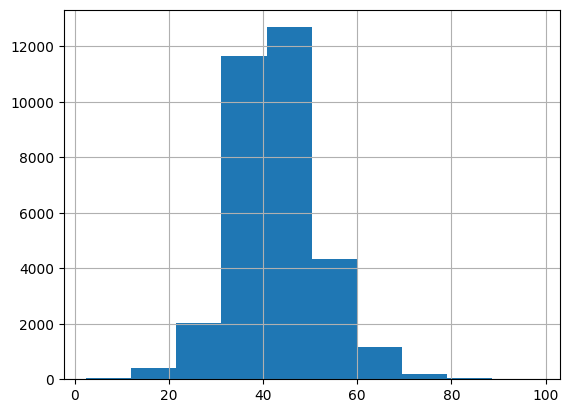

In [40]:
df_demographic_clean["MedianAgeInYears"].hist()
df_demographic_clean["MedianAgeInYears"].describe()

A distribuição da mediana de idades das regiões segue uma distribuição próxima da normal, onde a grande maioria das ZCTAs possui mediana de idade próxima entre 37 e 47 anos e alguns poucas regiões mais velhas ou mais novas que isso.

In [41]:
df_demographic_clean["MedianAgeInYears"].isnull().sum()

np.int64(173)

In [42]:
df_demographic_clean[df_demographic_clean["MedianAgeInYears"].isnull()]

,Id,GeographicAreaName,TotalPopulation,SexRatio(males per 100 females),Population_Under5Years,Population_5to9Years,Population_10to14Years,Population_15to19Years,Population_20to24Years,Population_25to34Years,Population_35to44Years,Population_45to54Years,Population_55to59Years,Population_60to64Years,Population_65to74Years,Population_75to84Years,Population_85YearsAndOver,MedianAgeInYears
42,8600000US35074,ZCTA5 35074,99,86.80,0,0,0,0,0,99,0,0,0,0,0,0,0,NaN
178,8600000US35559,ZCTA5 35559,12,100.00,0,0,0,0,0,0,6,6,0,0,0,0,0,NaN
207,8600000US35615,ZCTA5 35615,60,185.79,0,0,0,0,0,0,43,0,17,0,0,0,0,NaN
470,8600000US36470,ZCTA5 36470,51,142.90,0,0,0,0,0,0,0,30,0,0,21,0,0,NaN
566,8600000US36727,ZCTA5 36727,12,71.40,0,0,0,0,0,0,0,0,0,7,0,5,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32873,8600000US82422,ZCTA5 82422,17,88.90,0,0,0,0,0,0,0,0,0,0,9,8,0,NaN
32908,8600000US82640,ZCTA5 82640,45,80.00,0,0,0,0,0,0,0,0,0,20,25,0,0,NaN
32935,8600000US82833,ZCTA5 82833,96,113.30,0,0,0,0,0,0,0,0,0,0,45,51,0,NaN
32943,8600000US82844,ZCTA5 82844,20,100.00,0,0,0,0,0,0,0,0,0,0,0,20,0,NaN


Os dados de mediana de idade por região apresentam 173 valores nulos. Porém, neste caso é possível inferir a mediana das idades a partir dos dados de faixas de idade (Population_AtoBYears), já que nenhum desses dados está faltante.
Estes valores nulos provavelmente acontecem pois, nesses registros, apenas algumas poucas faixas de idade são representadas. 


Para fazer essa transformação, cada faixa de valores de idade será transformado na mediana que representa esta faixa. A partir desta informação, a mediana será estimada a partir da média ponderada das idades medianas obtidas para cada faixa de idade. Lermbrando que a mediana de um conjunto par de valores é a média dos 2 valores centrais e estamos calculando uma estimativa, portanto este cálculo é factível.

In [43]:
age_ranges = {
    "Population_Under5Years": 2.5,
    "Population_5to9Years": 7.5,
    "Population_10to14Years": 12.5,
    "Population_15to19Years": 17.5,
    "Population_20to24Years": 22.5,
    "Population_25to34Years": 30,
    "Population_35to44Years": 40,
    "Population_45to54Years": 50,
    "Population_55to59Years": 57.5,
    "Population_60to64Years": 62.5,
    "Population_65to74Years": 70,
    "Population_75to84Years": 80,
    "Population_85YearsAndOver": 90
}
# Calcular a média ponderada
weighted_sum = sum(df_demographic_clean[age_range] * weight for age_range, weight in age_ranges.items())
mean_age = weighted_sum / df_demographic_clean["TotalPopulation"]

In [44]:
# Preencher os valores nulos com a média ponderada
df_demographic_clean["MedianAgeInYears"].fillna(mean_age, inplace=True)

/tmp/ipykernel_57859/2906532688.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_demographic_clean["MedianAgeInYears"].fillna(mean_age, inplace=True)
/tmp/ipykernel_57859/2906532688.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_demographic_clean["MedianAgeInYears"].fillna(mean_age, inplace=True)


In [45]:
df_demographic_clean

,Id,GeographicAreaName,TotalPopulation,SexRatio(males per 100 females),Population_Under5Years,Population_5to9Years,Population_10to14Years,Population_15to19Years,Population_20to24Years,Population_25to34Years,Population_35to44Years,Population_45to54Years,Population_55to59Years,Population_60to64Years,Population_65to74Years,Population_75to84Years,Population_85YearsAndOver,MedianAgeInYears
0,8600000US35004,ZCTA5 35004,12045,94.1,805,1075,898,477,578,2088,1628,1200,886,683,1017,534,176,35.5
1,8600000US35005,ZCTA5 35005,7344,86.1,504,453,511,499,214,788,795,968,612,561,798,485,156,44.0
2,8600000US35006,ZCTA5 35006,2883,108.2,96,153,303,129,156,183,367,430,296,260,280,201,29,47.2
3,8600000US35007,ZCTA5 35007,26332,95.0,1936,1992,1837,1762,1376,3119,3849,3907,1665,1323,2096,1106,364,37.7
4,8600000US35010,ZCTA5 35010,20613,90.5,1306,1465,944,1217,1128,2513,2106,2950,1512,1472,2421,1155,424,42.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33115,8600000US00979,ZCTA5 00979,16130,91.6,402,532,554,726,1005,1935,2109,2468,1368,1148,1974,1363,546,48.7
33116,8600000US00982,ZCTA5 00982,14346,81.0,431,952,795,769,854,1975,1446,1769,957,948,1201,1654,595,44.8
33117,8600000US00983,ZCTA5 00983,33947,81.4,1833,1589,1841,2203,2957,4809,3712,4081,1930,1574,4003,2405,1010,40.8
33118,8600000US00985,ZCTA5 00985,31682,82.4,1171,1427,1833,2304,2032,3491,3966,4073,1732,2047,4207,2498,901,43.6


#### Salvamento de dados

In [46]:
df_demographic_clean.to_csv('curated_data/demographic_data.csv', index=False)

### Dados Economicos

In [47]:
df_economic

,id,Geographic Area Name,TotalHouseholds_LessThan$10.000,TotalHouseholds_$10.000to$14.999,TotalHouseholds_$15.000to$24.999,TotalHouseholds_$25.000to$34.999,TotalHouseholds_$35.000to$49.999,TotalHouseholds_$50.000to$74.999,TotalHouseholds_$75.000to$99.999,TotalHouseholds_$100.000to$149.999,TotalHouseholds_$150.000to$199.999,TotalHouseholds_$200.000OrMore
0,8600000US35004,ZCTA5 35004,198,71,298,513,647,1117,529,945,245,61
1,8600000US35005,ZCTA5 35005,188,184,318,293,353,562,299,407,67,26
2,8600000US35006,ZCTA5 35006,71,20,117,104,154,176,124,194,51,7
3,8600000US35007,ZCTA5 35007,396,208,670,462,1173,1854,1578,2224,473,254
4,8600000US35010,ZCTA5 35010,700,610,1093,957,1056,1512,807,749,254,249
...,...,...,...,...,...,...,...,...,...,...,...,...
629275,8600000US00979,ZCTA5 00979,735,471,1547,1374,957,1390,662,643,99,319
629276,8600000US00982,ZCTA5 00982,1299,483,1184,848,1104,657,206,79,34,16
629277,8600000US00983,ZCTA5 00983,2638,1368,2495,1845,1906,1952,511,363,110,96
629278,8600000US00985,ZCTA5 00985,2426,1150,2266,1777,1873,1737,501,395,15,26


In [48]:
df_economic.isnull().sum()

id                                    0
Geographic Area Name                  0
TotalHouseholds_LessThan$10.000       0
TotalHouseholds_$10.000to$14.999      0
TotalHouseholds_$15.000to$24.999      0
TotalHouseholds_$25.000to$34.999      0
TotalHouseholds_$35.000to$49.999      0
TotalHouseholds_$50.000to$74.999      0
TotalHouseholds_$75.000to$99.999      0
TotalHouseholds_$100.000to$149.999    0
TotalHouseholds_$150.000to$199.999    0
TotalHouseholds_$200.000OrMore        0
dtype: int64

In [49]:
df_economic.describe()

,TotalHouseholds_LessThan$10.000,TotalHouseholds_$10.000to$14.999,TotalHouseholds_$15.000to$24.999,TotalHouseholds_$25.000to$34.999,TotalHouseholds_$35.000to$49.999,TotalHouseholds_$50.000to$74.999,TotalHouseholds_$75.000to$99.999,TotalHouseholds_$100.000to$149.999,TotalHouseholds_$150.000to$199.999,TotalHouseholds_$200.000OrMore
count,629280.000000,629280.000000,629280.000000,629280.000000,629280.000000,629280.000000,629280.000000,629280.000000,629280.000000,629280.000000
mean,230.234903,160.920380,331.454771,330.243810,451.798581,631.313194,465.690791,553.135386,247.101238,280.055707
std,441.467545,276.893133,520.917773,503.567121,673.905420,927.015415,696.950905,888.368115,469.367588,684.806531
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,9.000000,25.000000,25.000000,36.000000,49.000000,31.000000,29.000000,6.000000,3.000000
50%,55.000000,45.000000,98.000000,100.000000,139.000000,195.000000,137.000000,135.000000,40.000000,29.000000
75%,257.000000,188.000000,415.000000,416.000000,578.000000,831.000000,611.000000,681.250000,254.000000,202.000000
max,7901.000000,3942.000000,5410.000000,4349.000000,5988.000000,8466.000000,6491.000000,8705.000000,6095.000000,11968.000000


Aparentemente os dados econômicos não necessitam nenhum tratamento especial de outliers ou dados faltantes. Porém, três transformações iniciais são importantes para análises futuras, são elas:

- Total de residências (TotalHouseholds) 
- Média da receita das residências na região baseado na mediana das faixas de receita (IncomeMean)
- Normalizar faixas de receita de residências pela proporção

#### Total de residências

In [50]:
# lista de colunas com informações de residências
households_info_columns = list(df_economic.columns)
households_info_columns.remove('Geographic Area Name')
households_info_columns.remove('id')

In [51]:
# Total de residências  
df_economic["TotalHouseholds"] =  df_economic[households_info_columns].sum(axis=1)

In [52]:
# Verificando regiões com dados zerados de residências 
df_economic[df_economic["TotalHouseholds"] == 0]

,id,Geographic Area Name,TotalHouseholds_LessThan$10.000,TotalHouseholds_$10.000to$14.999,TotalHouseholds_$15.000to$24.999,TotalHouseholds_$25.000to$34.999,TotalHouseholds_$35.000to$49.999,TotalHouseholds_$50.000to$74.999,TotalHouseholds_$75.000to$99.999,TotalHouseholds_$100.000to$149.999,TotalHouseholds_$150.000to$199.999,TotalHouseholds_$200.000OrMore,TotalHouseholds
47,8600000US35082,ZCTA5 35082,0,0,0,0,0,0,0,0,0,0,0
121,8600000US35229,ZCTA5 35229,0,0,0,0,0,0,0,0,0,0,0
142,8600000US35457,ZCTA5 35457,0,0,0,0,0,0,0,0,0,0,0
279,8600000US35896,ZCTA5 35896,0,0,0,0,0,0,0,0,0,0,0
367,8600000US36082,ZCTA5 36082,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
629141,8600000US83121,ZCTA5 83121,0,0,0,0,0,0,0,0,0,0,0
629257,8600000US00936,ZCTA5 00936,0,0,0,0,0,0,0,0,0,0,0
629259,8600000US00950,ZCTA5 00950,0,0,0,0,0,0,0,0,0,0,0
629260,8600000US00951,ZCTA5 00951,0,0,0,0,0,0,0,0,0,0,0


Verifica-se que o total de residências é 0 em 11419 regiões. Esses dados não agregam na análise, portanto serão eliminados.

In [53]:
df_economic_clean = df_economic[df_economic["TotalHouseholds"] > 0]

#### Receita mediana

Este cálculo é feito de forma parecida com o realizado nos dados demográficos para a mediana de idade dos dados faltantes.

In [54]:
# Receita mediana
households_income_median_ranges = {
    "TotalHouseholds_LessThan$10.000": 5000,
    "TotalHouseholds_$10.000to$14.999": 12500,
    "TotalHouseholds_$15.000to$24.999": 20000,
    "TotalHouseholds_$25.000to$34.999": 30000,
    "TotalHouseholds_$35.000to$49.999": 42500,
    "TotalHouseholds_$50.000to$74.999": 62000,
    "TotalHouseholds_$75.000to$99.999": 87000,
    "TotalHouseholds_$100.000to$149.999": 125000,
    "TotalHouseholds_$150.000to$199.999": 175000,
    "TotalHouseholds_$200.000OrMore": 300000
}
# Calcular a média ponderada
weighted_sum = sum(df_economic_clean[income_range] * weight for income_range, weight in households_income_median_ranges.items())
mean_income = weighted_sum / df_economic_clean["TotalHouseholds"]
df_economic_clean["WeightedMeanIncome"] = mean_income

/tmp/ipykernel_57859/21381421.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_economic_clean["WeightedMeanIncome"] = mean_income


count    617861.000000
mean      75883.763861
std       29519.362917
min        5000.000000
25%       57442.507371
50%       69820.143885
75%       87284.411277
max      300000.000000
Name: WeightedMeanIncome, dtype: float64

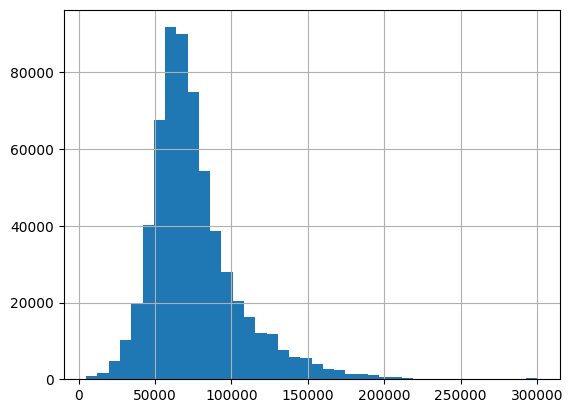

In [55]:
df_economic_clean["WeightedMeanIncome"].hist(bins=40)
df_economic_clean["WeightedMeanIncome"].describe()

A distribuição das receitas médias ponderadas das regiões é levemente assimétrica à direita, porém não apresenta nenhuma inconsistência.

#### Normalização dos dados

In [56]:
# Normalização
df_economic_clean[households_info_columns] = df_economic_clean[households_info_columns].div(df_economic_clean["TotalHouseholds"], axis=0)


/tmp/ipykernel_57859/2241133777.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_economic_clean[households_info_columns] = df_economic_clean[households_info_columns].div(df_economic_clean["TotalHouseholds"], axis=0)


In [57]:
df_economic_clean

,id,Geographic Area Name,TotalHouseholds_LessThan$10.000,TotalHouseholds_$10.000to$14.999,TotalHouseholds_$15.000to$24.999,TotalHouseholds_$25.000to$34.999,TotalHouseholds_$35.000to$49.999,TotalHouseholds_$50.000to$74.999,TotalHouseholds_$75.000to$99.999,TotalHouseholds_$100.000to$149.999,TotalHouseholds_$150.000to$199.999,TotalHouseholds_$200.000OrMore,TotalHouseholds,WeightedMeanIncome
0,8600000US35004,ZCTA5 35004,0.042820,0.015355,0.064446,0.110943,0.139922,0.241566,0.114403,0.204369,0.052984,0.013192,4624,74676.038062
1,8600000US35005,ZCTA5 35005,0.069707,0.068224,0.117909,0.108639,0.130886,0.208380,0.110864,0.150908,0.024842,0.009640,2697,61049.128661
2,8600000US35006,ZCTA5 35006,0.069745,0.019646,0.114931,0.102161,0.151277,0.172888,0.121807,0.190570,0.050098,0.006876,1018,68354.616896
3,8600000US35007,ZCTA5 35007,0.042617,0.022385,0.072105,0.049720,0.126238,0.199526,0.169824,0.239346,0.050904,0.027335,9292,82964.001291
4,8600000US35010,ZCTA5 35010,0.087642,0.076374,0.136847,0.119820,0.132215,0.189308,0.101039,0.093777,0.031802,0.031176,7987,60511.205709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629275,8600000US00979,ZCTA5 00979,0.089667,0.057460,0.188728,0.167622,0.116750,0.169574,0.080761,0.078443,0.012078,0.038917,8197,56065.511773
629276,8600000US00982,ZCTA5 00982,0.219797,0.081726,0.200338,0.143486,0.186802,0.111168,0.034856,0.013367,0.005753,0.002707,5910,31785.702200
629277,8600000US00983,ZCTA5 00983,0.198585,0.102981,0.187820,0.138889,0.143481,0.146944,0.038467,0.027326,0.008281,0.007227,13284,35791.252635
629278,8600000US00985,ZCTA5 00985,0.199408,0.094526,0.186257,0.146063,0.153954,0.142775,0.041180,0.032468,0.001233,0.002137,12166,34178.735821


In [58]:
df_economic_clean.to_csv('curated_data/economic_data.csv', index=False)

### Dados Geográficos

In [59]:
df_geographic

,Lab Id,Address,Location,Zipcode
0,L152,"3800 PLEASANT HILL RD STE 1, DULUTH, GA 30096","34.000319,-84.1629724",30096.0
1,L520,"1614 N JAMES ST, ROME, NY 13440","43.2311327,-75.4445363",13440.0
2,L141,"12911 120TH AVE NE STE D60, KIRKLAND, WA 98034","47.7162786,-122.1838152",98034.0
3,L524,"5667 PEACHTREE DUNWOODY RD 250, ATLANTA, GA 30342","33.9093875,-84.3529096",30342.0
4,L545,"1204 IL HWY 164, OQUAWKA, IL 61469","40.9309925,-90.9437598",61469.0
...,...,...,...,...
114,L886,"1819 MARLTON PIKE W., CHERRY HILL, NJ 08002","39.9184081,-75.035649",8002.0
115,L535,"603 SENECA ST 4, ONEIDA, NY 13421","43.0773695,-75.6536905",13421.0
116,L723,"8052 STATE ROUTE 12, BARNEVELD, NY 13304","43.2530101,-75.1860015",13304.0
117,L163,"3906 LILLIE AVE STE 3, DAVENPORT, IA 52806","41.5611182,-90.5915183",52806.0


#### Limpeza

In [60]:
df_geographic.isnull().sum()

Lab Id      0
Address     0
Location    0
Zipcode     1
dtype: int64

In [61]:
df_geographic[df_geographic.isnull().any(axis=1)]

,Lab Id,Address,Location,Zipcode
83,-2,Unavailable,Unavailable,NaN


Os dados geográficos apresentam apenas um dado faltante. Analisando o mesmo é possível verificar que o registro não possui nenhuma informação relevante, por isso pode ser retirado da base.

In [62]:
df_geographic = df_geographic.dropna(subset=['Zipcode'])

#### Transformação

Quanto aos dados geográficos, a única transformação importante é a conversão de Zipcode em zonas geográficas (ZCTAs)

In [63]:
df_geographic["Geographic Area Name"] = df_geographic["Zipcode"].apply(lambda x: 
                                                       f"ZCTA5 {int(x):05d}" 
                                                       if pd.notna(x) else x)

/tmp/ipykernel_57859/3755662581.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_geographic["Geographic Area Name"] = df_geographic["Zipcode"].apply(lambda x:


In [64]:
df_geographic

,Lab Id,Address,Location,Zipcode,Geographic Area Name
0,L152,"3800 PLEASANT HILL RD STE 1, DULUTH, GA 30096","34.000319,-84.1629724",30096.0,ZCTA5 30096
1,L520,"1614 N JAMES ST, ROME, NY 13440","43.2311327,-75.4445363",13440.0,ZCTA5 13440
2,L141,"12911 120TH AVE NE STE D60, KIRKLAND, WA 98034","47.7162786,-122.1838152",98034.0,ZCTA5 98034
3,L524,"5667 PEACHTREE DUNWOODY RD 250, ATLANTA, GA 30342","33.9093875,-84.3529096",30342.0,ZCTA5 30342
4,L545,"1204 IL HWY 164, OQUAWKA, IL 61469","40.9309925,-90.9437598",61469.0,ZCTA5 61469
...,...,...,...,...,...
114,L886,"1819 MARLTON PIKE W., CHERRY HILL, NJ 08002","39.9184081,-75.035649",8002.0,ZCTA5 08002
115,L535,"603 SENECA ST 4, ONEIDA, NY 13421","43.0773695,-75.6536905",13421.0,ZCTA5 13421
116,L723,"8052 STATE ROUTE 12, BARNEVELD, NY 13304","43.2530101,-75.1860015",13304.0,ZCTA5 13304
117,L163,"3906 LILLIE AVE STE 3, DAVENPORT, IA 52806","41.5611182,-90.5915183",52806.0,ZCTA5 52806


#### Salvamento dos dados

In [65]:
df_geographic.to_csv('curated_data/geographic_data.csv', index=False)

Isto finaliza a etapa de limpeza e tratamento inicial dos dados brutos, carregando-os na camada de dados 'curated'. 